In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import gc
from multiprocessing import Process

In [2]:
def get_indicator(frame):
    N = len(frame)
    STEP = 5
    frame.drop("<TIME>", axis=1, inplace=True)
    frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL')
    frame.DATE = frame.DATE.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%y'))
    
#     frame['delta_close'] =  np.concatenate((np.array([0]),abs(np.diff(frame.CLOSE,1))))
#     frame['delta_max'] =  np.concatenate((np.array([0]),abs(np.diff(frame.HIGH,1))))
#     frame['delta_close_open'] = frame.CLOSE - frame.OPEN
    frame['delta_open'] =  np.concatenate((np.array([0]),abs(np.diff(frame.OPEN,1))))
    #___
    frame['log_vol'] = np.log(frame.VOL)
    mult = frame['log_vol']*frame.delta_open
    frame['indctr'] = pd.Series(mult).rolling(STEP).sum()
    frame['indctr_emw'] = pd.Series.ewm(frame.indctr,5).mean()
    #___
    indicator_median = frame['indctr_emw'].median()
    return frame['indctr_emw'].values, indicator_median

In [3]:
frame = pd.read_csv('./SPB/AAPL.txt', header = 0, sep=';')

In [9]:
def plot_hists(list_names):
    N = 10
    fig, axes = plt.subplots(N,N, figsize=(15,15), dpi = 150)
    row, col = 0,0
    for name in list_names:
        frame = pd.read_csv('./SPB/'+name, header = 0, sep=';')
        indctr_emw, median = get_indicator(frame)
        indctr_emw +=1e-5
        b = axes[row][col].hist(np.log(indctr_emw), 20)
        axes[row][col].vlines(np.log(median), 0 , b[0].max(), color='black')
        axes[row][col].set_yticks([])
        axes[row][col].set_title(name)
        col +=1
        if col%(N) == 0:
            col = 0
            row +=1
    plt.savefig('plt/hist_'+name.split('.')[0]+'.jpeg')

/home/tesla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/tesla/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tesla/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


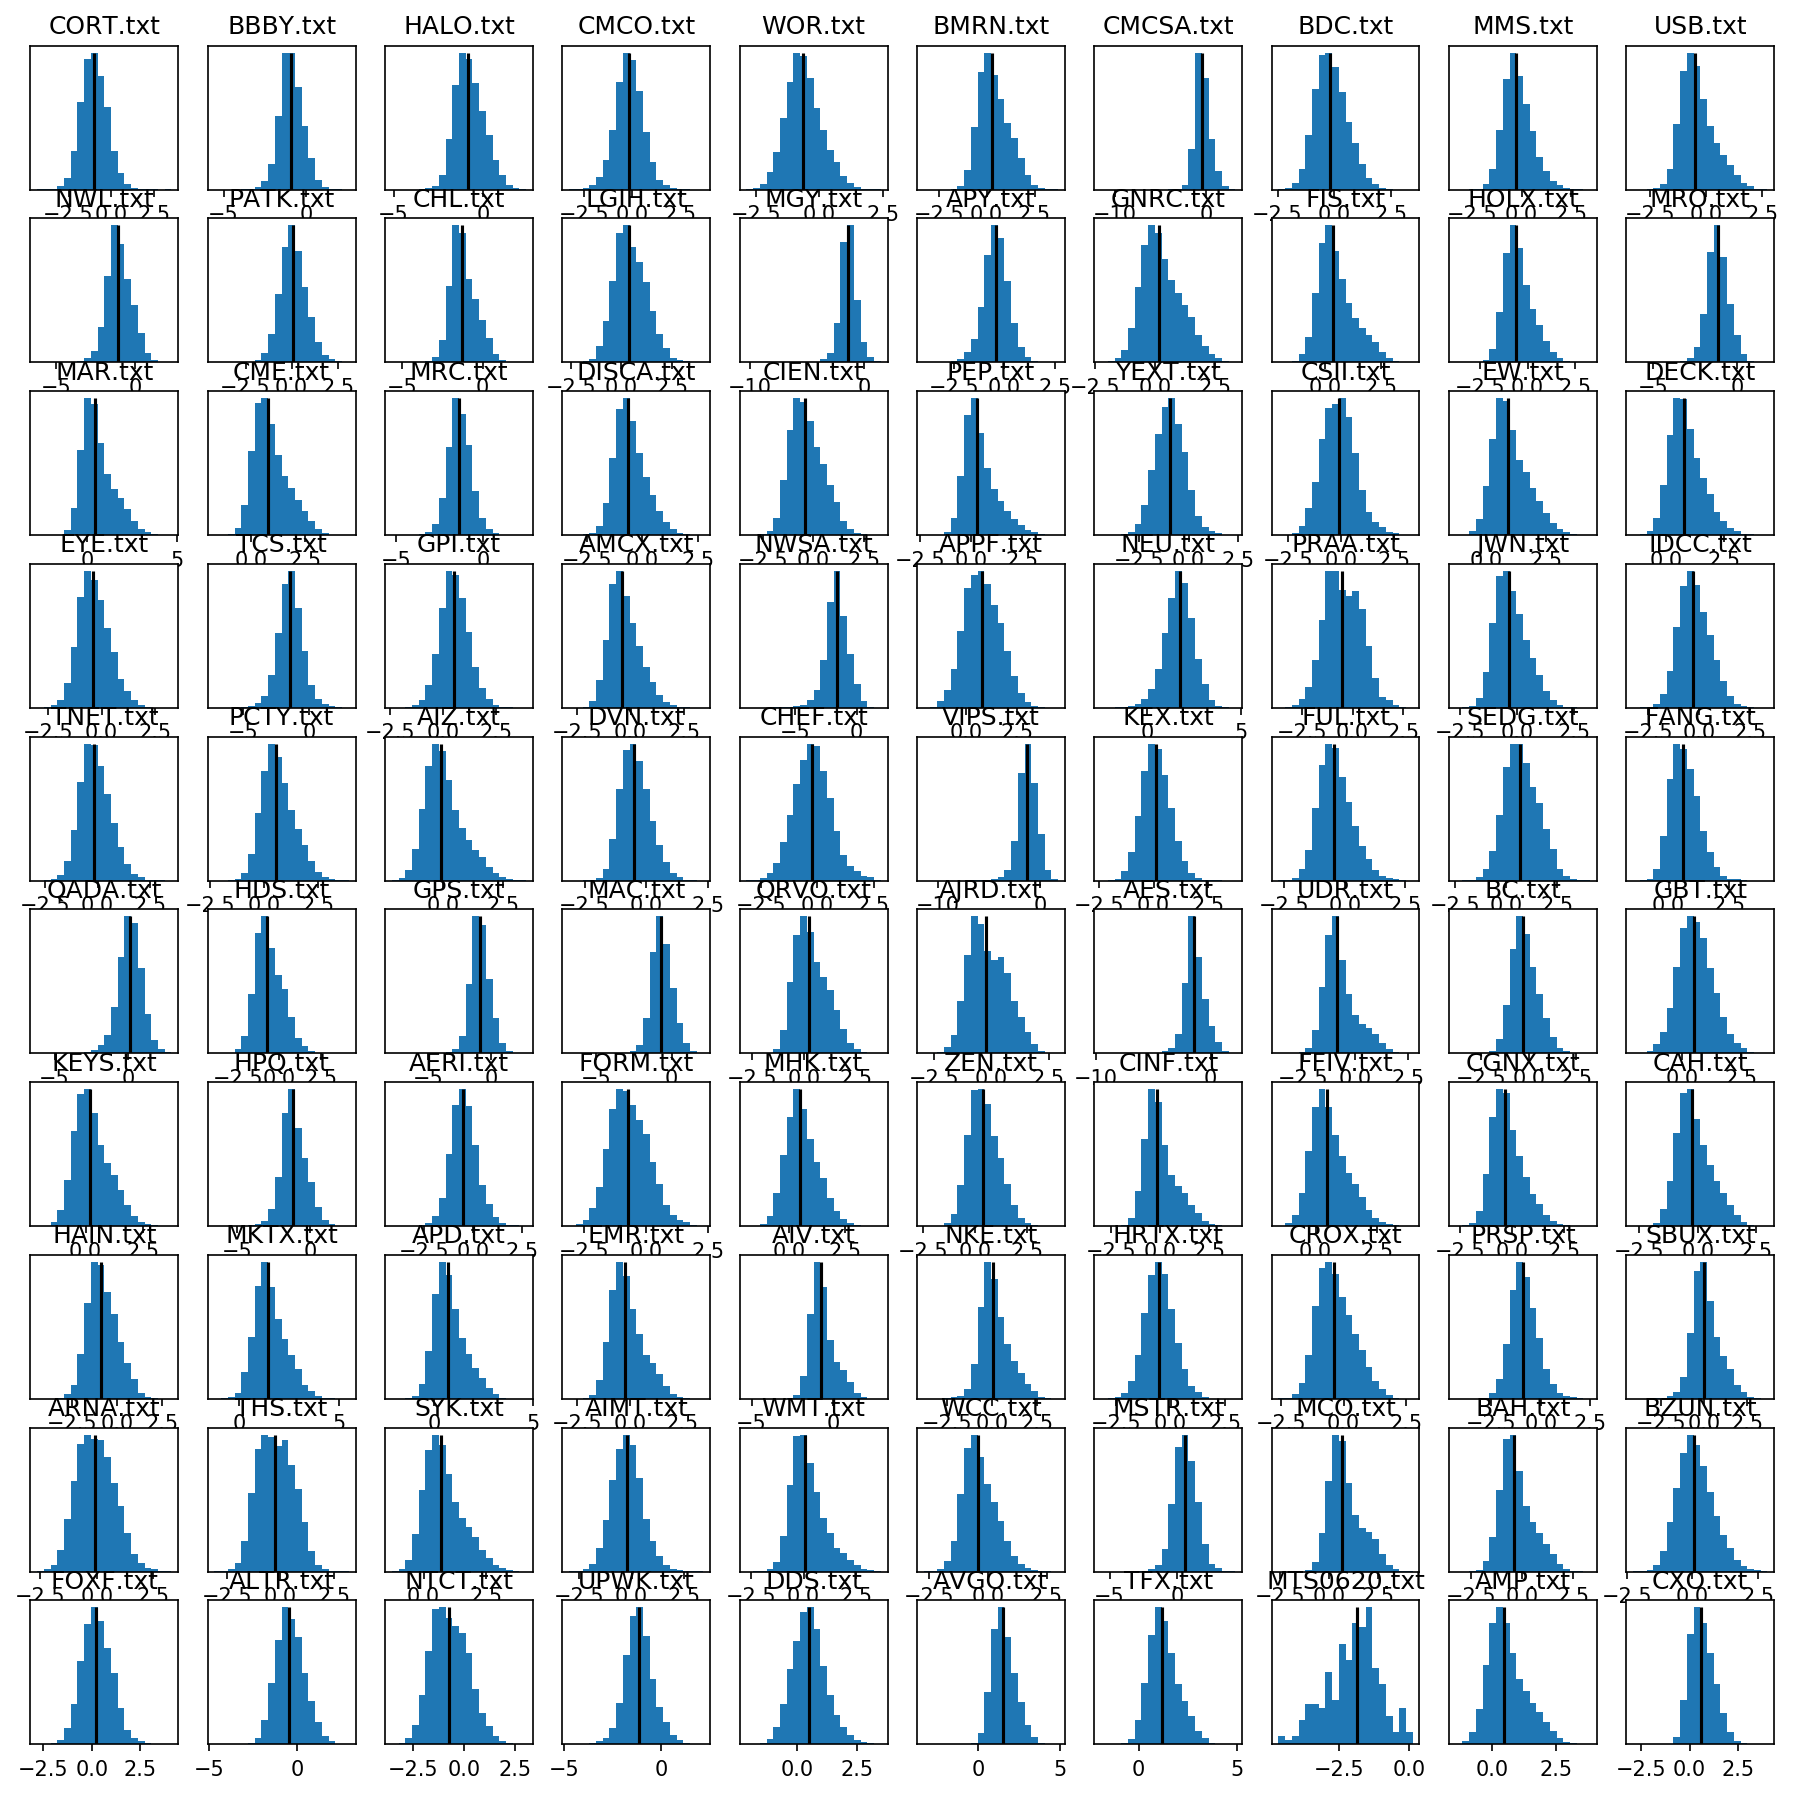

In [10]:
names = os.listdir('SPB')[:100]
len(names)
plot_hists(names)

In [37]:
def plot_stocks(list_names,N):
    for name in list_names:
        fig = plt.figure(figsize=(12,4), dpi = 150)
        frame = pd.read_csv('./SPB/'+name, header = 0, sep=';')[-N:]
        indctr_emw, median = get_indicator(frame)
        plt.plot(frame.CLOSE, lw=0.7)
        plt.title(name + '1.5 медианы')
        maska = frame.indctr_emw > (median + median*0.5)
        plt.scatter(frame.CLOSE[maska].index,frame.CLOSE[maska],s=3,color='red')
        plt.savefig('plt/indicator/'+name.split('.')[0]+'.jpeg')
        plt.close('all')
        del fig
        gc.collect()

In [38]:
step = 30
names = os.listdir('SPB')[:600]
count = round(len(names)/step)
print(count)
N = 5000
process = []
for i in range(count):
    procc = Process(target=plot_stocks, args = (names[i*step:(i+1)*step],N))
    procc.start()
    process.append(procc)
for p in process:
    p.join()

20


Process Process-97:
Traceback (most recent call last):
  File "/home/tesla/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/tesla/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-37-eaa725039c83>", line 4, in plot_stocks
    frame = pd.read_csv('./SPB/'+name, header = 0, sep=';')[-N:]
  File "/home/tesla/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 685, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/home/tesla/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 457, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/home/tesla/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 895, in __init__
    self._make_engine(self.engine)
  File "/home/tesla/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1135, in _make_engine
    self._engine = CParserWra

In [4]:
frame = pd.read_csv('./SPB/AAPL.txt', header = 0, sep=';')
frame.drop("<TIME>", axis=1, inplace=True)
frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL')
frame.DATE = frame.DATE.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%y'))

In [6]:
frame['delta_close'] =  np.concatenate((np.array([0]),abs(np.diff(frame.CLOSE,1))))
frame['delta_open'] =  np.concatenate((np.array([0]),abs(np.diff(frame.OPEN,1))))
frame['delta_max'] =  np.concatenate((np.array([0]),abs(np.diff(frame.HIGH,1))))
frame['delta_close_open'] = frame.CLOSE - frame.OPEN
# frame=frame.drop('delta',axis=1)
# frame.head(50)

In [8]:
N = len(frame)
STEP = 5
# frame['indctr'] = np.zeros(N)
frame['log_vol'] = np.log(frame.VOL)
# mean = frame['log_vol'].mean()
median = frame['log_vol'].median()
mult = frame['log_vol']*frame.delta_open
frame['indctr'] = pd.Series(mult).rolling(STEP).sum()
# for i in range(STEP,N-STEP):
#     frame['indctr'].iloc[i] = np.sum(mult[i-STEP:i])
    
frame['indctr_emw'] = pd.Series.ewm(frame.indctr,5).mean()

In [9]:
indicator_mean = frame.indctr.mean()
indicator_median = frame.indctr.median()
print(indicator_mean,indicator_median)

indicator_mean = frame.indctr_emw.mean()
indicator_median = frame.indctr_emw.median()
print(indicator_mean,indicator_median)

4.521730374453837 2.4266298724081325
4.521719366623895 2.588290438252282


/home/tesla/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tesla/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


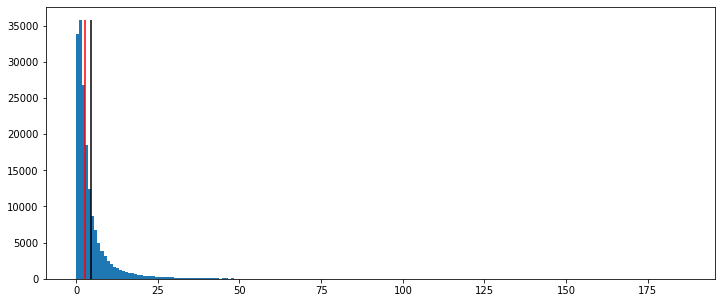

In [10]:
fig = plt.figure(figsize=(12,5))
ar = plt.hist(frame.indctr, 200);
# plt.xlim(0,10)
plt.vlines(indicator_mean,0,ar[0].max())
plt.vlines(indicator_median,0,ar[0].max(),'r')

In [11]:
frame

DATE    OPEN    HIGH     LOW   CLOSE  VOL  delta_close  \
0      2019-04-15  199.31  199.31  199.31  199.31   29         0.00   
1      2019-04-15  199.31  199.31  199.31  199.31    5         0.00   
2      2019-04-15  199.32  199.32  199.32  199.32    1         0.01   
3      2019-04-15  199.07  199.07  199.06  199.06   45         0.26   
4      2019-04-15  199.23  199.23  199.23  199.23    1         0.17   
...           ...     ...     ...     ...     ...  ...          ...   
174129 2020-04-14  288.03  288.03  288.03  288.03   34         0.03   
174130 2020-04-14  288.00  288.18  288.00  288.18  183         0.15   
174131 2020-04-14  288.18  288.18  288.18  288.18   39         0.00   
174132 2020-04-14  288.30  288.30  288.10  288.10    3         0.08   
174133 2020-04-15  288.30  288.30  288.10  288.10   64         0.00   

        delta_open  delta_max  delta_close_open    indctr   log_vol  \
0             0.00       0.00              0.00       NaN  3.367296   
1             0.00       0.00              0.00       NaN  1.609438   
2             0.01       0.01              0.00       NaN  0.000000   
3             0.25       0.25             -0.01       NaN  3.806662   
4             0.16       0.16              0.00  0.951666  0.000000   
...            ...        ...               ...       ...       ...   
174129        0.08       0.00              0.00  1.133007  3.526361   
174130        0.03       0.15              0.18  0.438393  5.209486   
174131        0.18       0.00              0.00  1.097835  3.663562   
174132        0.12       0.12             -0.20  1.229668  1.098612   
174133        0.00       0.00             -0.20  1.229668  4.158883   

        indctr_emw  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4         0.951666  
...            ...  
174129    1.762519  
174130    1.541831  
174131    1.467832  
174132    1.428138  
174133    1.395060  

[174134 rows x 13 columns]

4.521719366623895 2.588290438252282


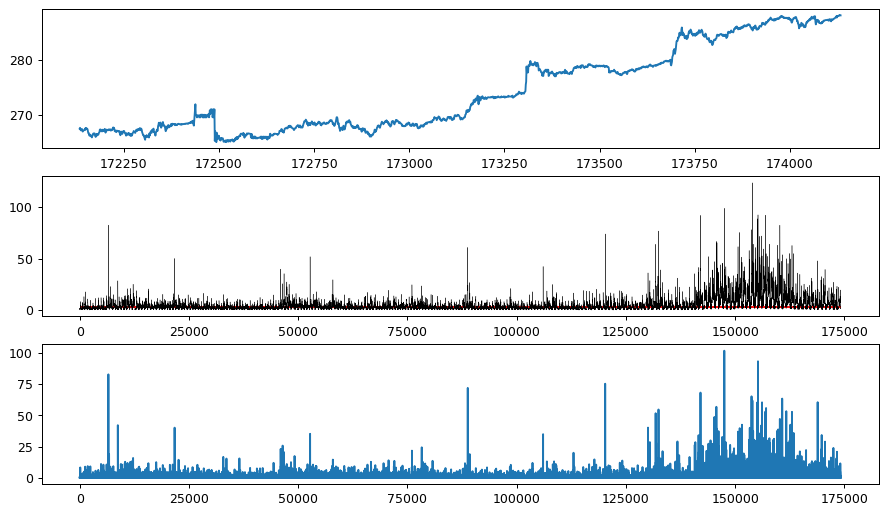

In [12]:
N = 2000

fig,ax = plt.subplots(3,1,dpi = 90, figsize=(12,7))

ax[0].plot(frame.CLOSE[-N:])
# ax[1].plot(frame.delta_open[-N:],'r')
# ax[2].plot(frame.delta_max[-N:],'b')
# ax[2].plot(frame.delta_close_open[-N:],'g--')
# ax[1].plot(frame.indctr)
indicator_mean = frame.indctr_emw.mean()
indicator_median = frame.indctr_emw.median()
print(indicator_mean,indicator_median)
ax[1].plot(frame['indctr_emw'],color='black', linestyle='-', lw=0.3)
ax[1].hlines(indicator_median,frame['indctr_emw'].index[0],frame['indctr_emw'].index[-1],'red')

# ax[1].hlines(indicator_mean,-1,N+1,'black')
# ax[1].hlines(indicator_median,-1,N+1,'red')

ax[2].plot(mult)


In [1]:
N = 10000
fig,ax = plt.subplots(2,1,dpi = 150, figsize=(15,7))
ax[0].plot(frame.CLOSE[-N:],lw=0.7)
maska = frame.indctr_emw[-N:] > indicator_median 
ax[0].scatter(frame[-N:].CLOSE[maska].index,frame[-N:].CLOSE[maska],s=3,color='red')


NameError: name 'plt' is not defined

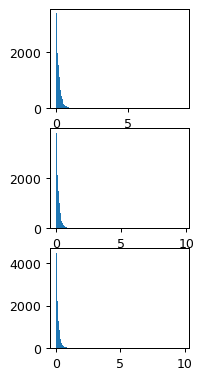

In [14]:
fig,ax = plt.subplots(3,1,dpi = 90, figsize=(2,5))
ax[0].hist(frame.delta_close[-N:],120);
ax[1].hist(frame.delta_open[-N:],120);
ax[2].hist(frame.delta_max[-N:],120);

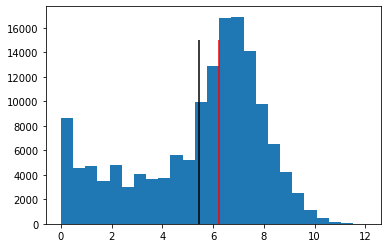

In [34]:
plt.hist(frame.log_vol,25);
plt.vlines(mean, 0, 15000)
plt.vlines(median, 0, 15000,'red')

In [ ]:

for i in range(step,N-step):
    a = np.sum(frame['M'][i-step:i])
    frame['L'][i] = a

In [18]:
now = datetime.datetime.now()
now - datetime.timedelta(hours = now.hour, minutes = now.minute, seconds = now.second)

datetime.datetime(2020, 4, 21, 0, 0, 0, 801436)